C:\Users\83479\AppData\Local\Temp\ipykernel_28788\3542422998.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


,feature,importance,std
16,po2_max,0.024770,0.003315
5,mbp_min,0.025122,0.005191
27,bun_min,0.025150,0.011963
38,pt_max,0.025584,0.003460
28,bun_max,0.026526,0.012714
12,glucose_vital_max,0.027128,0.004242
3,sbp_min,0.028152,0.005480
49,egfr,0.033138,0.012059
0,admission_age,0.036750,0.007171
44,weight_admit,0.043985,0.003950


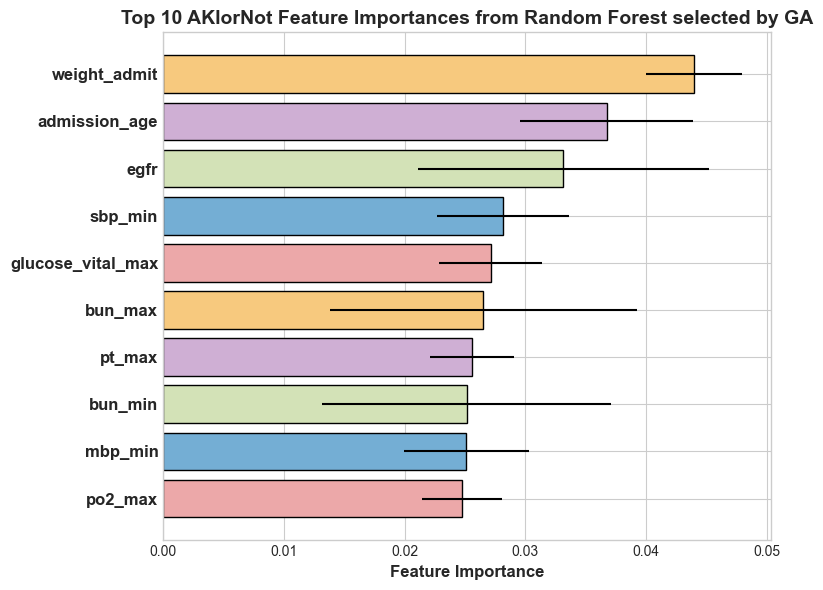

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-whitegrid')

def plot_feature_importance_rf(X, y, model=None, top_n=10,
                               palette=['#D2EEFF', '#A8DCFF','#7ECBFF','#5EB8F9','#42A4EB',
                                         '#2B90D9', '#2782C4', '#2374AF', '#1E669A', '#1A5884',],columns=None):
    """
    使用随机森林获得各个特征的贡献度，并绘制TOP N重要特征的横向条形图。

    参数:
        X: pandas.DataFrame或ndarray，特征数据
        y: array-like，目标变量
        model: 已初始化的随机森林模型（可选），如果为None，则默认使用RandomForestClassifier
        top_n: int，显示TOP N重要特征（默认10）
        palette: list，自定义配色列表，用于条形图

    返回:
        feat_imp_df_top: DataFrame，包含TOP N特征及其重要性和标准差
    """
    if model is None:
        model = RandomForestClassifier(random_state=42,n_jobs=-1)

    model.fit(X, y)

    importances = model.feature_importances_
    importances_std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

    if columns is not None:
        feature_names = columns
    else:
        feature_names = [f'Feature {i}' for i in range(X.shape[1])]

    feat_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances,
        'std': importances_std
    }).sort_values(by='importance', ascending=False)

    feat_imp_df_top = feat_imp_df.head(top_n)[::-1]


    colors = [palette[i % len(palette)] for i in range(len(feat_imp_df_top))]

    fig, ax = plt.subplots(figsize=(8, top_n * 0.5 + 1))
    ax.barh(range(len(feat_imp_df_top)), feat_imp_df_top['importance'],
            xerr=feat_imp_df_top['std'], color=colors, edgecolor='black')


    ax.set_yticks(range(len(feat_imp_df_top)))
    ax.set_yticklabels(feat_imp_df_top['feature'], fontsize=12, fontweight='bold')
    ax.set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
    ax.set_title(f'Top {top_n} AKIorNot Feature Importances from Random Forest selected by GA', fontsize=14, fontweight='bold')

    plt.tight_layout()
    # plt.show()
    plt.savefig('rf_Feature_Importances.png', bbox_inches='tight', dpi=300)

    return feat_imp_df_top

selected_features = ['admission_age', 'race', 'heart_rate_max', 'sbp_min', 'sbp_max',
       'mbp_min', 'mbp_max', 'resp_rate_max', 'temperature_vital_min',
       'temperature_vital_max', 'spo2_min', 'spo2_max', 'glucose_vital_max',
       'glucose_vital_mean', 'lactate_max', 'ph_min', 'po2_max',
       'baseexcess_min', 'baseexcess_max', 'hematocrit_lab_min',
       'hematocrit_lab_max', 'hemoglobin_lab_min', 'hemoglobin_lab_max',
       'platelets_min', 'platelets_max', 'wbc_min', 'bicarbonate_lab_min',
       'bun_min', 'bun_max', 'chloride_lab_min', 'chloride_lab_max',
       'creatinine_min', 'creatinine_max', 'sodium_lab_min',
       'abs_basophils_min', 'abs_eosinophils_max', 'abs_monocytes_min',
       'abs_neutrophils_min', 'pt_max', 'ptt_min', 'ptt_max', 'gcs_min',
       'gcs_verbal', 'gcs_unable', 'weight_admit', 'scr_delta', 'scr_ratio',
       'high_lactate_flag', 'siri_score', 'egfr', 'interaction_fever_wbc']
X = pd.read_csv('X_train.csv').loc[:, selected_features]
y = pd.read_csv('y_train.csv')['aki_stage'].map({0: 0, 1: 1, 2:1, 3:1}).values.ravel()
names = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
plot_feature_importance_rf(X, y, model=None, top_n=10, palette=['#ECA8A9', '#74AED4', '#D3E2B7', '#CFAFD4', '#F7C97E'],columns=names)#['#ECA8A9', '#74AED4', '#D3E2B7', '#CFAFD4', '#F7C97E']

C:\Users\83479\AppData\Local\Temp\ipykernel_28788\353998970.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
c:\Users\83479\.conda\envs\code_project\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,feature,importance,std
22,platelets_min,0.024400,0.002486
9,temperature_vital_mean,0.024609,0.002643
14,po2_min,0.024740,0.002837
40,ptt_min,0.025592,0.002621
15,po2_max,0.026269,0.002725
47,bun_scr_ratio,0.027213,0.004914
27,bun_max,0.027362,0.010422
1,admission_age,0.028830,0.002661
30,creatinine_min,0.032444,0.012896
43,weight_admit,0.032947,0.002379


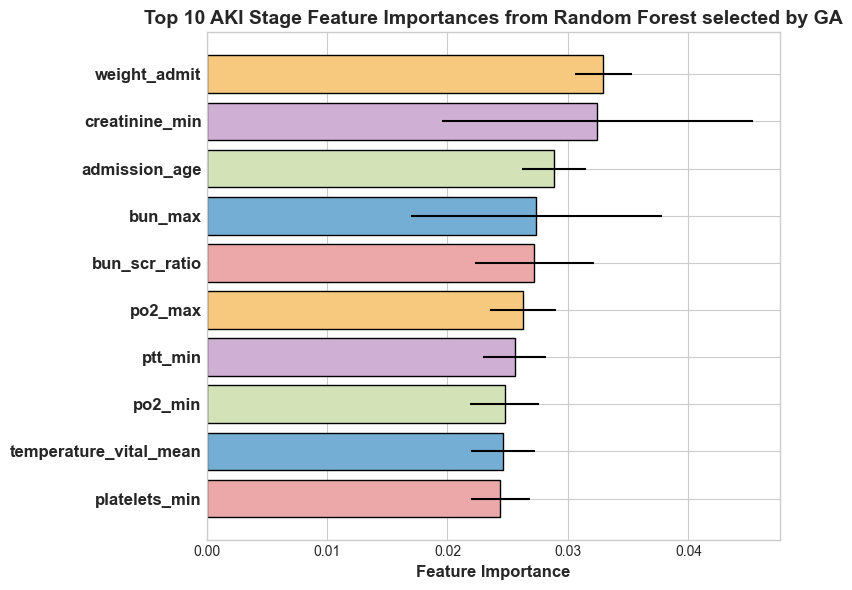

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-whitegrid')

def plot_feature_importance_rf(X, y, model=None, top_n=10,
                               palette=['#D2EEFF', '#A8DCFF','#7ECBFF','#5EB8F9','#42A4EB',
                                         '#2B90D9', '#2782C4', '#2374AF', '#1E669A', '#1A5884',],columns=None):
    """
    使用随机森林获得各个特征的贡献度，并绘制TOP N重要特征的横向条形图。

    参数:
        X: pandas.DataFrame或ndarray，特征数据
        y: array-like，目标变量
        model: 已初始化的随机森林模型（可选），如果为None，则默认使用RandomForestClassifier
        top_n: int，显示TOP N重要特征（默认10）
        palette: list，自定义配色列表，用于条形图

    返回:
        feat_imp_df_top: DataFrame，包含TOP N特征及其重要性和标准差
    """
    if model is None:
        model = RandomForestClassifier(random_state=42,n_jobs=-1)

    model.fit(X, y)

    importances = model.feature_importances_
    importances_std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

    if columns is not None:
        feature_names = columns
    else:
        feature_names = [f'Feature {i}' for i in range(X.shape[1])]

    feat_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances,
        'std': importances_std
    }).sort_values(by='importance', ascending=False)

    feat_imp_df_top = feat_imp_df.head(top_n)[::-1]

    colors = [palette[i % len(palette)] for i in range(len(feat_imp_df_top))]

    fig, ax = plt.subplots(figsize=(8, top_n * 0.5 + 1))
    ax.barh(range(len(feat_imp_df_top)), feat_imp_df_top['importance'],
            xerr=feat_imp_df_top['std'], color=colors, edgecolor='black')

    ax.set_yticks(range(len(feat_imp_df_top)))
    ax.set_yticklabels(feat_imp_df_top['feature'], fontsize=12, fontweight='bold')
    ax.set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
    ax.set_title(f'Top {top_n} AKI Stage Feature Importances from Random Forest selected by GA', fontsize=14, fontweight='bold')

    plt.tight_layout()
    # plt.show()
    plt.savefig('rf_stage_Feature_Importances.png', bbox_inches='tight', dpi=300)

    return feat_imp_df_top

selected_features = ['gender', 'admission_age', 'race', 'heart_rate_max', 'sbp_min',
       'sbp_max', 'mbp_min', 'resp_rate_min', 'resp_rate_max',
       'temperature_vital_mean', 'spo2_min', 'glucose_vital_mean',
       'lactate_min', 'lactate_max', 'po2_min', 'po2_max', 'pco2_min',
       'baseexcess_min', 'baseexcess_max', 'totalco2_max',
       'hemoglobin_lab_min', 'hemoglobin_lab_max', 'platelets_min', 'wbc_min',
       'aniongap_min', 'aniongap_max', 'bun_min', 'bun_max', 'calcium_lab_min',
       'chloride_lab_min', 'creatinine_min', 'glucose_lab_min',
       'sodium_lab_min', 'potassium_lab_min', 'abs_basophils_min',
       'abs_basophils_max', 'abs_eosinophils_min', 'abs_lymphocytes_max',
       'abs_neutrophils_min', 'inr_max', 'ptt_min', 'gcs_verbal', 'gcs_unable',
       'weight_admit', 'scr_delta', 'scr_ratio', 'hypotension_flag',
       'bun_scr_ratio', 'interaction_hypotension_bun_scr', 'fever_flag',
       'interaction_fever_wbc']
X = pd.read_csv('X_train.csv').loc[:, selected_features]
y = pd.read_csv('y_train.csv')

mask = y['aki_stage'] != 0
y = y.loc[mask]
X = X.loc[mask]
y = y-1

names = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
plot_feature_importance_rf(X, y, model=None, top_n=10, palette=['#ECA8A9', '#74AED4', '#D3E2B7', '#CFAFD4', '#F7C97E'],columns=names)

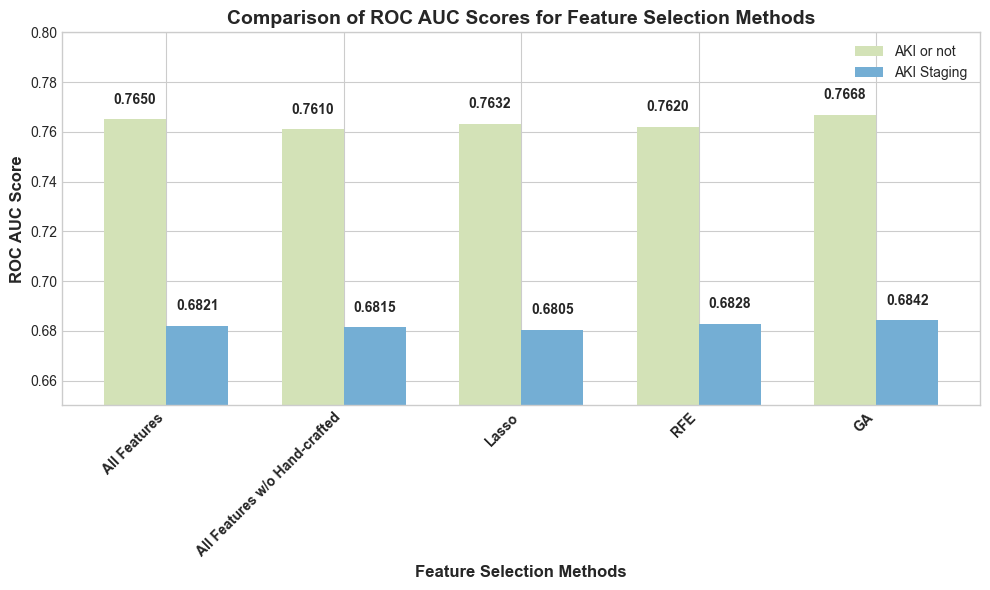

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods_aki = ['All Features', 'All Features w/o Hand-crafted', 'Lasso','RFE', 'GA']
roc_auc_aki = [0.765025893131847, 0.7610172257108234, 0.7632145549924956,0.7620494779574148, 0.7668284540434396]

methods_aki_staging = [ 'All Features', 'All Features w/o Handing', 'Lasso','RFE', 'GA']
roc_auc_aki_staging = [ 0.6820562972988947, 0.6815224760085884, 0.680469593007928,0.6828278781934972, 0.6842316168603686]

# Colors
colors = ['#ECA8A9', '#74AED4', '#D3E2B7', '#CFAFD4', '#F7C97E']

# Plotting the ROC AUC for both models
fig, ax = plt.subplots(figsize=(10, 6))

# Plot ROC AUC for "Without AKI" and "AKI Staging" groups
bar_width = 0.35
index = np.arange(len(methods_aki))

bar1 = ax.bar(index, roc_auc_aki, bar_width, color=colors[2], label="AKI or not")
bar2 = ax.bar(index + bar_width, roc_auc_aki_staging, bar_width, color=colors[1], label="AKI Staging")

# Adding labels, title, and ticks
ax.set_xlabel('Feature Selection Methods', fontsize=12, fontweight='bold')
ax.set_ylabel('ROC AUC Score', fontsize=12, fontweight='bold')
ax.set_title('Comparison of ROC AUC Scores for Feature Selection Methods', fontsize=14, fontweight='bold')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(methods_aki, rotation=45, ha='right', fontsize=10, fontweight='bold')
ax.set_ylim([0.65, 0.80])
ax.legend()
# Adding the ROC AUC score numbers on top of the bars
for i in range(len(roc_auc_aki)):
    ax.text(index[i], roc_auc_aki[i] + 0.005, f'{roc_auc_aki[i]:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax.text(index[i] + bar_width, roc_auc_aki_staging[i] + 0.005, f'{roc_auc_aki_staging[i]:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
# Show plot
plt.tight_layout()
# plt.show()
plt.savefig('Comparison ofFeature Selection Methods.png', bbox_inches='tight', dpi=300)


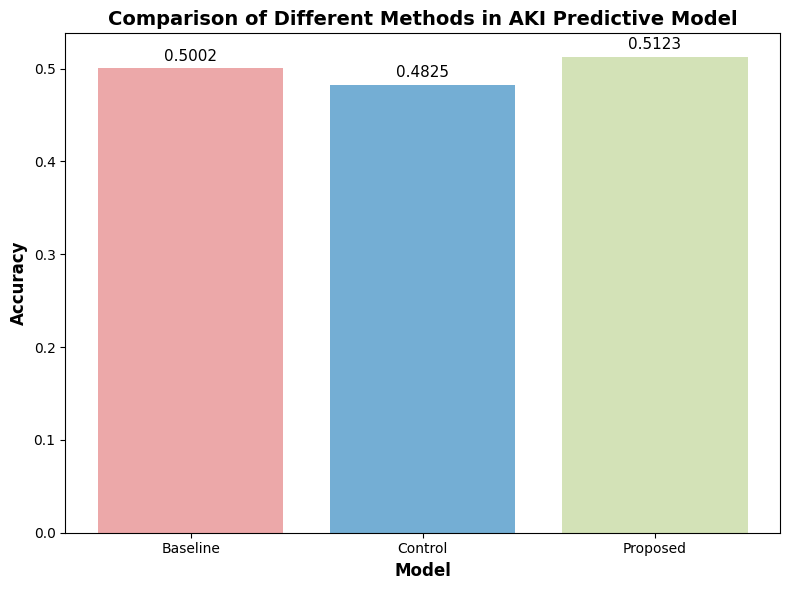

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the different models
labels = ['Baseline', 'Control', 'Proposed']
accuracies = [0.5002, 0.4825, 0.5123]

# Define the color palette
colors = ['#ECA8A9', '#74AED4', '#D3E2B7']

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(labels, accuracies, color=colors)

# Set the title and labels
ax.set_title('Comparison of Different Methods in AKI Predictive Model', fontsize=14, fontweight='bold')
ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')

# Add the accuracy labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha='center', va='bottom', fontsize=11)

# Display the plot
plt.tight_layout()
plt.show()